#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

import xport
import os

from functools import reduce
import statsmodels.formula.api as smf

#### Description of Dataset

The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. NHANES is a major program of the National Center for Health Statistics (NCHS). NCHS is part of the Centers for Disease Control and Prevention (CDC) and has the responsibility for producing vital and health statistics for the Nation.  

The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

The latest dataset that is available publicly covers 2017 - 2018.

https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017

#### List Available Files

In [2]:
data_dir = "data"
files = os.listdir(data_dir+"/")
for file in files:
    if file.endswith(".XPT"):
        print(file)

nhanes_2017_2018_blood_pressure.XPT
nhanes_2017_2018_body_measures.XPT
nhanes_2017_2018_demographics.XPT
nhanes_2017_2018_lab_Albumin_Creatinine_Urine.XPT
nhanes_2017_2018_lab_complete_blood_count.XPT
nhanes_2017_2018_lab_HDL.XPT
nhanes_2017_2018_lab_hepatitisA.XPT
nhanes_2017_2018_lab_hiv_antibody_test.XPT
nhanes_2017_2018_lab_total_cholesterol.XPT
nhanes_2017_2018_lab_urine_flow_rate.XPT
nhanes_2017_2018_lab_urine_pregnancy_test.XPT
nhanes_2017_2018_oral_health.XPT


#### Define Dictionary of Dictionaries for Encoding Features

In [3]:
enc_dict = {'gender':{1:'male', 2:'female'},
            'race':{1:'mexican_american', 2:'hispanic_other', 3:'white', 4:'black', 5:'other'},
            'birth_country':{1:'us', 2:'others', 77:'refused', 99:'dont_know'},
            'edu_child':{0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 11:11, 12:12,
                         13:12, 14:12, 15:13, 55:4, 66:8, 77:np.nan, 99:np.nan},
            'edu_adult':{1:'lt9', 2:'9-11', 3:'hs_grad', 4:'some_coll', 5:'coll_grad', 7:np.nan,
                         9:np.nan},
            'hiv':{1:'reactive', 2:'non-reactive'}}

#### Define Helper Functions for Loading Data

In [4]:
def load_data(data_dir, file, col_dict, key):
    """
    Read in a series of data files
    Inputs:
        data_dir: directory where file(s) is(are) located
        file_list: list of files to load
        col_dict: list of column names to include in dataframe
    """
    if file.endswith(".XPT"):
        lines = []
        with open(os.path.join(data_dir, file), 'rb') as f:
            for row in xport.Reader(f):
                lines.append(row)
        columns = col_dict[file][0]
        df = pd.DataFrame(np.array(lines)[:, col_dict[file][1]], columns=columns)
        df.set_index(key)
    return df

#### Define Dictionaries Specifying which Files to Load and which Columns to Include

In [5]:
file_list = ["nhanes_2017_2018_demographics.XPT",
             "nhanes_2017_2018_body_measures.XPT",
             "nhanes_2017_2018_blood_pressure.XPT",
             "nhanes_2017_2018_lab_total_cholesterol.XPT",
             "nhanes_2017_2018_lab_hiv_antibody_test.XPT",
             "nhanes_2017_2018_lab_urine_flow_rate.XPT",
             "nhanes_2017_2018_lab_HDL.XPT"]

col_dict_demo = {"nhanes_2017_2018_demographics.XPT":[['seqn','gender','age','race','birth_country','edu_child','edu_adult'],
                                                 [0,3,4,6,12,15,16],]}
col_dict_body = {"nhanes_2017_2018_body_measures.XPT":[['seqn','weight','height','bmi'],
                                                 [0,2,8,10],]}
col_dict_bp = {"nhanes_2017_2018_blood_pressure.XPT":[['seqn', 'bp_sys', 'bp_dia'],
                                                      [0,9,10]]}
col_dict_tchol = {"nhanes_2017_2018_lab_total_cholesterol.XPT":[['seqn', 'tot_chol'],
                                                                [0,1]]}
col_dict_hiv = {"nhanes_2017_2018_lab_hiv_antibody_test.XPT":[['seqn', 'hiv'],
                                                              [0,1]]}
col_dict_uflow = {"nhanes_2017_2018_lab_urine_flow_rate.XPT":[['seqn', 'uflow1', 'uflow2', 'uflow3'],
                                                              [0,2,5,8]]}
col_dict_hdl = {"nhanes_2017_2018_lab_HDL.XPT":[['seqn', 'hdl'],
                                                [0,1]]}

col_dict_list = [col_dict_demo,
                 col_dict_body,
                 col_dict_bp,
                 col_dict_tchol, 
                 col_dict_hiv,
                 col_dict_uflow,
                 col_dict_hdl]

# Load and Merge Data Files
data_frames = []
for i in range(len(file_list)):
    data_frames.append(load_data(data_dir, file_list[i], col_dict_list[i], "seqn"))

#### Merge Dataframes

In [6]:
df_merged = reduce(lambda left, right: pd.merge(left,right,on=["seqn"],
                                                how='inner'), data_frames).fillna(np.nan)
df_merged.set_index('seqn', inplace=True)
df_merged.head()

,gender,age,race,birth_country,edu_child,edu_adult,weight,height,bmi,bp_sys,bp_dia,tot_chol,hiv,uflow1,uflow2,uflow3,hdl
seqn,,,,,,,,,,,,,,,,,
93706.0,1.0,18.0,5.0,1.0,15.0,NaN,66.3,175.7,21.5,112.0,74.0,148.0,2.0,NaN,NaN,NaN,47.0
93711.0,1.0,56.0,5.0,2.0,NaN,5.0,62.1,170.6,21.3,108.0,68.0,238.0,2.0,0.605,0.286,NaN,72.0
93712.0,1.0,18.0,1.0,2.0,12.0,NaN,58.9,172.8,19.7,112.0,68.0,182.0,2.0,NaN,0.714,NaN,48.0
93714.0,2.0,54.0,4.0,1.0,NaN,4.0,87.1,147.8,39.9,NaN,NaN,230.0,2.0,0.620,NaN,NaN,42.0
93717.0,1.0,22.0,3.0,1.0,NaN,3.0,74.4,174.1,24.5,116.0,62.0,213.0,2.0,0.214,0.659,NaN,53.0


#### Initial Plan for Data Exploration

- Encode features such as `gender` and `race` with more descriptive names.
- Determine the percentage missing values for each feature and decide whether to drop the feature or impute the missing values with a appropriate value such as the median for continuous features or the most prevalent one for categorical features. Note that imputation will introduce additional uncertainty.
- Add features if necessary.
- Determine distributions for continuous features and possible colinearities.
- Determine proportions of unique values in each of the categorical features.

##### 1. Encode Features  
The key, value pairs in the encoding dictionary (see above) are used to "encode" some of the categorical variables and change some values to `np.nan` based on a preliminary analysis of the features contained in each file. For some features, e.g., `race`, the numerical values are changed to more descriptive strings.

In [7]:
for key, value in enc_dict.items():
    df_merged[key] = df_merged[key].map(enc_dict[key])
    
df_merged.head()

,gender,age,race,birth_country,edu_child,edu_adult,weight,height,bmi,bp_sys,bp_dia,tot_chol,hiv,uflow1,uflow2,uflow3,hdl
seqn,,,,,,,,,,,,,,,,,
93706.0,male,18.0,other,us,13.0,NaN,66.3,175.7,21.5,112.0,74.0,148.0,non-reactive,NaN,NaN,NaN,47.0
93711.0,male,56.0,other,others,NaN,coll_grad,62.1,170.6,21.3,108.0,68.0,238.0,non-reactive,0.605,0.286,NaN,72.0
93712.0,male,18.0,mexican_american,others,12.0,NaN,58.9,172.8,19.7,112.0,68.0,182.0,non-reactive,NaN,0.714,NaN,48.0
93714.0,female,54.0,black,us,NaN,some_coll,87.1,147.8,39.9,NaN,NaN,230.0,non-reactive,0.620,NaN,NaN,42.0
93717.0,male,22.0,white,us,NaN,hs_grad,74.4,174.1,24.5,116.0,62.0,213.0,non-reactive,0.214,0.659,NaN,53.0


##### 2. Assess Number of Missing Values

In [8]:
print("Total number of observations:", df_merged.shape[0])
print("Percentage of missing values:")
print(round(df_merged.isnull().sum() / df_merged.shape[0] * 100))

Total number of observations: 3515
Percentage of missing values:
gender            0.0
age               0.0
race              0.0
birth_country     0.0
edu_child        92.0
edu_adult         8.0
weight            1.0
height            1.0
bmi               1.0
bp_sys           11.0
bp_dia           11.0
tot_chol          7.0
hiv               8.0
uflow1           15.0
uflow2           85.0
uflow3           99.0
hdl               7.0
dtype: float64


#### Data Cleaning and Feature Engineering  

##### Missing Values and Imputation

Note that the data used in this notebook will not be used for predictions in machine learning and, as such, missing values for features will be imputed on all observations. In case, the data will be used to make predictions it is necessary to first split the data into a training and validation (and test) set before imputation of missing values.

In [9]:
def percent_missing(df, threshold):
    """
    Returns a copy of the dataframe with missing values replace with the mean
    for numerical features and the most prevalent value for categorical features
    """
    df_copy = df.copy()
    num_obs = df_copy.shape[0]
    num_features = df_copy.shape[1]
    num_columns = []
    cat_columns = []
    drop_columns = []
    
    for column in df_copy.select_dtypes('object').columns:
        perc_missing = df_copy[column].isnull().sum() / num_obs
        if perc_missing > threshold:
            drop_columns.append(column)
        elif perc_missing > 0:
            cat_columns.append(column)
            
    for column in df_copy.select_dtypes(np.number).columns:
        perc_missing = df_copy[column].isnull().sum() / num_obs
        if perc_missing > threshold:
            drop_columns.append(column)
        elif perc_missing > 0 :
            num_columns.append(column)
            
    print("Numeric columns with missing values below "+str(threshold*100)+"%:", num_columns)
    print("Categorical columns with missing values below "+str(threshold*100)+"%:", cat_columns)
    print("Columns to be dropped:", drop_columns)
    print("\nPercentage of features to be dropped:", round(len(drop_columns)/num_features*100,0))
    
    df_copy.drop(drop_columns, axis=1, inplace=True)
    
    for column in num_columns:
        df_copy[column] = df_copy[column].fillna(df_copy[column].mean())
        
    for column in cat_columns:
        df_copy[column] = df_copy[column].fillna(df_copy[column].value_counts().index[0])
            
    return df_copy

df = percent_missing(df_merged, 0.16)

Numeric columns with missing values below 16.0%: ['weight', 'height', 'bmi', 'bp_sys', 'bp_dia', 'tot_chol', 'uflow1', 'hdl']
Categorical columns with missing values below 16.0%: ['edu_adult', 'hiv']
Columns to be dropped: ['edu_child', 'uflow2', 'uflow3']

Percentage of features to be dropped: 18.0


##### Add feature `obese` indicating whether an individual has a body mass index (BMI) of 30 or higher.

In [10]:
df['obese'] = df['bmi'] >= 30

In [11]:
df['obese'].replace({False:0, True:1}, inplace=True)

##### Description of continuous features.

In [12]:
df.describe()

,age,weight,height,bmi,bp_sys,bp_dia,tot_chol,uflow1,hdl,obese
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,38.325462,83.544691,167.274331,29.754278,119.961588,72.633163,187.294261,0.908414,52.605006,0.408819
std,12.538565,24.132880,9.925698,7.831981,15.441698,11.708171,38.143762,0.803588,15.050464,0.491686
min,18.000000,36.200000,138.300000,14.800000,72.000000,0.000000,92.000000,0.000000,10.000000,0.000000
25%,28.000000,66.500000,159.800000,24.300000,110.000000,66.000000,162.000000,0.426000,42.000000,0.000000
50%,38.000000,79.600000,166.900000,28.500000,119.961588,72.633163,187.000000,0.786000,51.000000,0.000000
75%,50.000000,96.100000,174.500000,33.700000,126.000000,78.000000,209.000000,1.013000,60.000000,1.000000
max,59.000000,242.600000,195.800000,86.200000,224.000000,124.000000,446.000000,8.810000,189.000000,1.000000


##### Display a pairplot to visualize the distribution for each numeric feature and possible differences between genders.  

Note that the features `weight` and `height` are not displayed since the derived feature `bmi` will be used in subsequent analyses. In addition, the feature `bp_dia` is not displayed because it is strongly correlated with `bp_sys` which is the feature of interest.

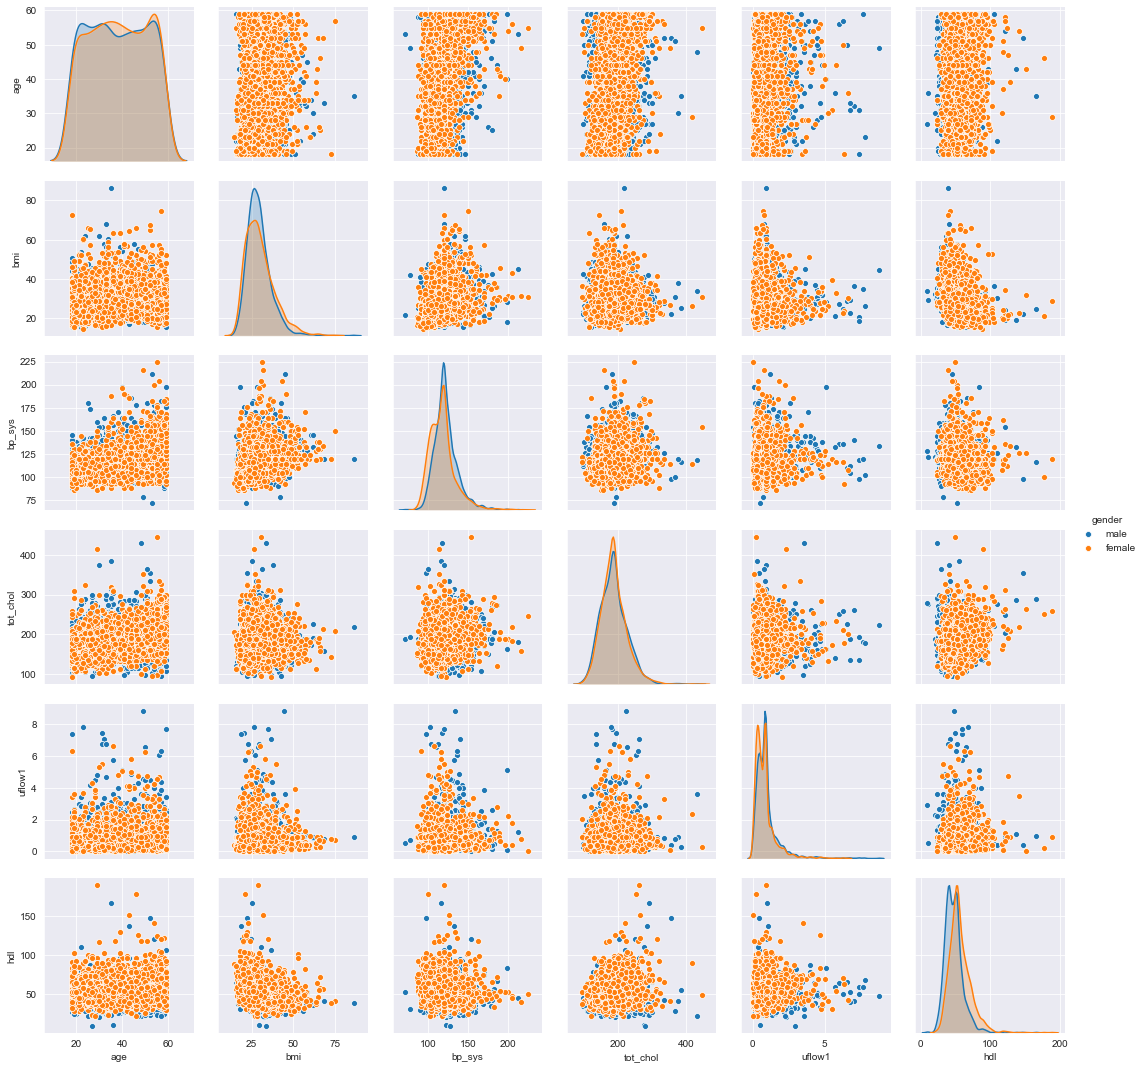

In [13]:
num_cols = ['age', 'bmi', 'bp_sys', 'tot_chol', 'uflow1', 'hdl']
sns.pairplot(df, vars=num_cols, hue='gender');

##### Display boxplots for continuous variables.

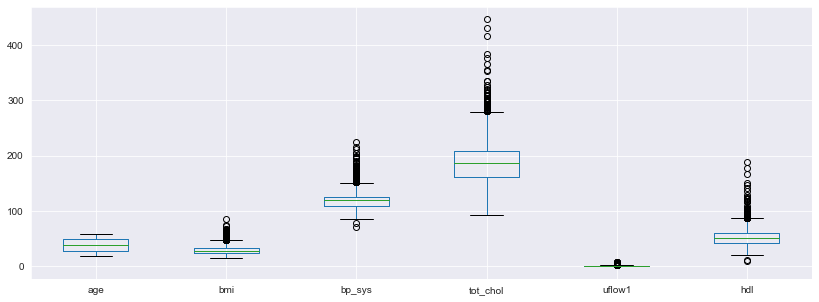

In [14]:
num_cols = ['age', 'bmi', 'bp_sys', 'tot_chol', 'uflow1', 'hdl']
plt.figure(figsize=(14,5))
df.boxplot(num_cols);

##### Display bar charts for categorical variables to assess relative proportions for categories within each feature.

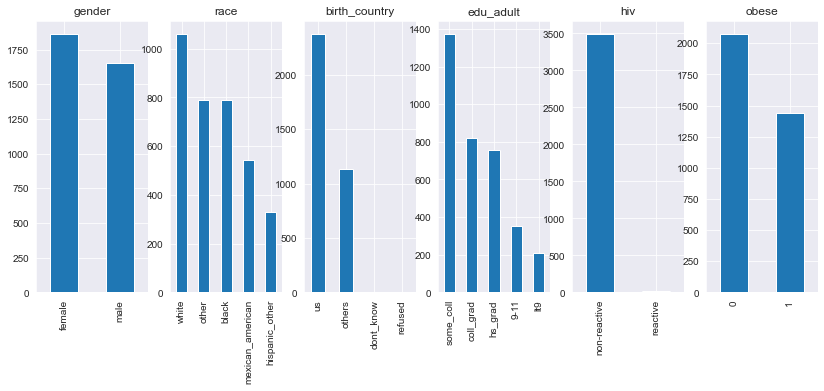

In [15]:
cat_columns = ['gender', 'race', 'birth_country', 'edu_adult', 'hiv', 'obese']

fig, ax = plt.subplots(1, len(cat_columns), figsize=(14,5))
for i, column in enumerate(df[cat_columns]):
    df[column].value_counts().plot(kind="bar", ax=ax[i]).set_title(column);

#### Key Findings of Exploratory Data Analysis

- Age seems to follow a uniform distribution. The features `bmi`, `bp_sys`, `tot_chol`, `uflow1`, and `hdl` approximate a normal distribution with `uflow1` and `hdl` being (slightly) right-skewed.
- All continuous features, with the exception of `age` have apparent outliers which are **not** assumed to have arisen in error.
- There seem to be no apparent gender-related differences among the numeric features.
- The feature `hiv` seems to be non-informative since more than 99% of observations are "non-reactive".
- Effect modification can be assessed by generating new features consisting of the product of two existing, categorical, features such as `gender` and `edu_adult`. This should be done if there is a "significant" difference in the coefficient of a particular feature when adjusted by another feature.

#### Research Questions

**Research Question 1: Is obesity associated with changes in systolic blood pressure?**
- $H_{0}$, there *is no* difference between the age-, gender-, and race-adjusted estimated means of systolic blood pressure in non-obese versus obese individuals
- $H_{A}$, there *is* a difference between the age-, gender-, and race-adjusted estimated means of systolic blood pressure in non-obese versus obese individuals

**Research Question 2: Is obesity associated with changes in levels of HDL?**
- $H_{0}$, there *is no* difference between the age-, gender-, and race-adjusted estimated means of HDL in non-obese versus obese individuals
- $H_{A}$, there *is* a difference between the age-, gender-, and race-adjusted estimated means of HDL in non-obese versus obese individuals

**Research Question 3: Is a lower level of adult education associated with increased systolic blood pressure?**
- $H_{0}$, there *is no* difference between the age-, gender-, and race-adjusted estimated means of systolic blood pressure in adults differing in their educationale level
- $H_{A}$, there *is* a *negative* association between the age-, gender-, and race-adjusted estimated means of systolic blood pressure and adult educational levels

#### Hypothesis Testing for Research Question 2

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
# Helper function
def hr_and_prop(ln_odds, ci):
    """
    Calculates the hazard ratio and proportion for a given
    ln(odds) and associated confidence interval
    """
    odds = np.exp(ln_odds)
    ci_odds = np.exp(ci)
    p = odds / (1+odds)
    return odds, ci_odds, p

Encode features as needed:

In [18]:
# Encode male as 0, female as 1
df['gender'].replace({'male':0, 'female':1}, inplace=True)

df['race'].replace({'mexican_american':0,
                    'black':1,
                    'white':2,
                    'hispanic_other':3,
                    'other':4}, inplace=True)

df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df['race'], prefix='race', drop_first=True)], axis=1)

In [19]:
logitfit = smf.logit('obese ~ hdl', data = df).fit()
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.640429
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  obese   No. Observations:                 3515
Model:                          Logit   Df Residuals:                     3513
Method:                           MLE   Df Model:                            1
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                 0.05322
Time:                        17:03:01   Log-Likelihood:                -2251.1
converged:                       True   LL-Null:                       -2377.6
Covariance Type:            nonrobust   LLR p-value:                 5.598e-57
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7976      0.150     11.963      0.000       1.503       2.092
hdl           -0.0421      0.003    -14.537      0.000      -0.048      -0.036
==============================================================================
"""

In [20]:
odds, ci_odds, p = hr_and_prop(-0.0421, (-0.048, -0.036))
print("Unadjusted association between systolic blood pressure and obesity:")
print("Odds:", np.round(odds,3), "95% CI:", np.round(ci_odds,3))
print("Proportion (probability):", np.round(p,2))

Unadjusted association between systolic blood pressure and obesity:
Odds: 0.959 95% CI: [0.953 0.965]
Proportion (probability): 0.49


**NB:** The results for the logistic regression using `hdl` as the predictor for `obese` show that with each unit increase of hdl, there is an decrease of approximately 4% with respect to the experiencing the outcome, i.e., obesity. Note that the intercept does not have a relevant, scientific interpretation but is needed to fully specify the relationship. The *P* value in the summary table indicates that the association between hdl and the ln(odds of obesity) is significant.

In [21]:
# Adjust for gender
logitfit2 = smf.logit('obese ~ hdl+gender', data = df).fit()
logitfit2.summary()

Optimization terminated successfully.
         Current function value: 0.633149
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  obese   No. Observations:                 3515
Model:                          Logit   Df Residuals:                     3512
Method:                           MLE   Df Model:                            2
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                 0.06398
Time:                        17:03:02   Log-Likelihood:                -2225.5
converged:                       True   LL-Null:                       -2377.6
Covariance Type:            nonrobust   LLR p-value:                 8.612e-67
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8770      0.153     12.253      0.000       1.577       2.177
hdl           -0.0492      0.003    -15.687      0.000      -0.055      -0.043
gender         0.5415      0.077      7.078      0.000       0.392       0.691
==============================================================================
"""

**NB:** The ln(odds of obesity) is slightly attenuated by the inclusion of gender. The results show that the ln(odds of obesity) for females equals 0.5415, as compared to males in individuals with the same `hdl` levels. This translates into an approximate increase in odds of 0.72 for females experiencing the outcome (obesity) as compared to males.

In [22]:
# Adjust for gender, age, and race
logitfit3 = smf.logit('obese ~ hdl+gender+age+race_1+race_2+race_3+race_4', data = df).fit()
logitfit3.summary()

Optimization terminated successfully.
         Current function value: 0.605378
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  obese   No. Observations:                 3515
Model:                          Logit   Df Residuals:                     3507
Method:                           MLE   Df Model:                            7
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                  0.1050
Time:                        17:03:02   Log-Likelihood:                -2127.9
converged:                       True   LL-Null:                       -2377.6
Covariance Type:            nonrobust   LLR p-value:                1.044e-103
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6101      0.202      7.983      0.000       1.215       2.005
hdl           -0.0538      0.003    -16.457      0.000      -0.060      -0.047
gender         0.5568      0.079      7.077      0.000       0.403       0.711
age            0.0180      0.003      6.077      0.000       0.012       0.024
race_1         0.3914      0.119      3.278      0.001       0.157       0.625
race_2        -0.1210      0.112     -1.084      0.278      -0.340       0.098
race_3        -0.5326      0.150     -3.552      0.000      -0.826      -0.239
race_4        -0.9630      0.124     -7.767      0.000      -1.206      -0.720
==============================================================================
"""

**NB:** The results of the adjusted ln(odds of obesity) shows that `hdl`, `gender`, `age`, and `race`, with the exception of `race_2` (white) are all significant indicators.  

The following formula relates the outcome to the predictors:  

ln(odds of obesity) = $1.61 - 0.054x_{1} + 0.557x_{2} + 0.018x_{3} + 0.3914x_{4} - 0.121x_{5} - 0.533x_{6} - 0.963x_{7}$ where $x_{1}$ is the level of hdl (mg/dL), $x_{2} = 1$ for females, zero for males, $x_{3}$ represents age (years), $x_{4} = 1$ for black, zero otherwise, $x_{5} = 1$ for white, zero otherwise, $x_{6} = 1$ for hispanic_other, zero otherwise, and $x_{7} = 1$ for other race, zero otherwise.

Given this information we can calculate the ln(odds of obesity) in a 50-year old black female with an hdl level of 100 mg/dL as compared to a 60-year, black male with an hdl level of 80 mg/dL as follows:

In [23]:
coeff = np.array([1.61, -0.054, 0.557, 0.018, 0.391, -0.121, -0.533, -0.963])
g1 = np.array([1, 100, 1, 50, 1, 0, 0, 0]) # 100 mg/dL hdl, female, 50 years, black
g2 = np.array([1, 80, 0, 60, 1, 0, 0, 0]) # 80 mg/dL hdl, male, 60 years, black

In [24]:
ln_odds = np.sum(coeff*g1 - coeff*g2)
print("Ln(odds of obesity):", round(ln_odds,3))
print("Odds of obesity:", round(np.exp(ln_odds),3))

Ln(odds of obesity): -0.703
Odds of obesity: 0.495


**Display a graph showing the estimated proportion (probability) of being obese for females and males by HDL level (mg/dL) and age quartile.**

In [25]:
# Add age quartiles to dataframe
df["age_quartile"] = pd.qcut(df["age"], q=4)

In [26]:
# Adjust for gender, age quartile
logitfit4 = smf.logit('obese ~ hdl+gender+age_quartile', data = df).fit()
logitfit4.summary()

Optimization terminated successfully.
         Current function value: 0.628264
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  obese   No. Observations:                 3515
Model:                          Logit   Df Residuals:                     3509
Method:                           MLE   Df Model:                            5
Date:                Wed, 10 Jun 2020   Pseudo R-squ.:                 0.07120
Time:                        17:03:02   Log-Likelihood:                -2208.3
converged:                       True   LL-Null:                       -2377.6
Covariance Type:            nonrobust   LLR p-value:                 5.025e-71
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                1.5524      0.164      9.472      0.000       1.231       1.874
age_quartile[T.Interval(28.0, 38.0, closed='right')]     0.3312      0.102      3.235      0.001       0.131       0.532
age_quartile[T.Interval(38.0, 50.0, closed='right')]     0.5262      0.099      5.339      0.000       0.333       0.719
age_quartile[T.Interval(50.0, 59.0, closed='right')]     0.4773      0.103      4.622      0.000       0.275       0.680
hdl                                                     -0.0493      0.003    -15.703      0.000      -0.055      -0.043
gender                                                   0.5417      0.077      7.036      0.000       0.391       0.693
========================================================================================================================
"""

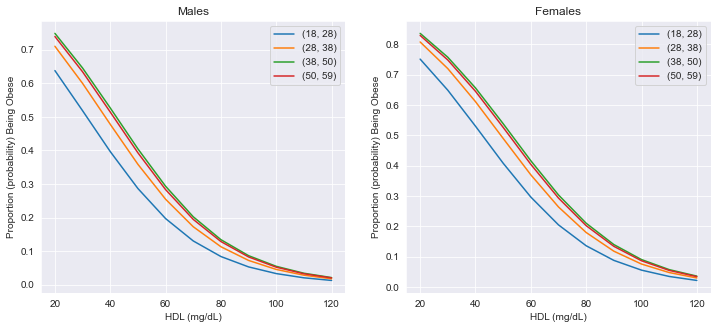

In [27]:
def plot_hdl_obese():
    """
    Returns a plot of estimated proportion for a specific group using a range
    of HDL levels
    """
    d = {0:"Males", 1:"Females"}
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    coeff_quartiles = [0, 0.3312, 0.5262, 0.4773]
    age_range = [(18,28), (28,38), (38,50), (50,59)]
    
    for gender in [0, 1]: # males, females
        for i in range(len(coeff_quartiles)):
            y = []
            for x in range(20, 121, 10):
                odds = np.exp(1.5524)*np.exp(0.5417*gender)*np.exp(-0.0493*x)*np.exp(coeff_quartiles[i])
                prob = odds/(1+odds)
                y.append(prob)
            ax[gender].plot(range(20,121,10),y, label=age_range[i]);
        ax[gender].set_xlabel("HDL (mg/dL)")
        ax[gender].set_ylabel("Proportion (probability) Being Obese")
        ax[gender].set_title(d[gender])
        ax[gender].legend()

plot_hdl_obese()

The graphs above show that an increasing level of HDL is associated with a decreased probability of being obese for both males and females. Note that males tend to have a lower probability of being obese at a given HDL level, as compared to females of a similar age group for most of the HDL studied. In addition, both males and females in the youngest age group have a lower probability as compared to older persons of the same gender.

#### Suggestions for Next Steps in Analyzing this Data

One logical extension for further analysis is to investigate the extent to which effect modification is responsible for changing the probability of specific outcomes, such as obesity, in relation to clinically relevant biomarkers and laboratory data. Note that the number of files and features in this particular study only comprise a fraction of what is available for each year. In addition, since the NHANES study has data available from 1999 one could follow the same chort over multiple years and determine whether, e.g.,  (age- and gender-specific) features have changing distributions from year to year.

#### Quality of Data

The data is of fairly high quality although not all features might be useful. The percentage of missing values is generally low for a particular feature and are well described in the codebook.  

Data is generally considered high quality if it is fit for its intended uses in operations, decision making and planning. Moreover, data is deemed of high quality if it correctly represents the real-world construct to which it refers. Both are evident in the NHANES data.